In [1]:
# Imports
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurar cache (importante!)
fastf1.Cache.enable_cache('../cache')

# Verificar
print("FastF1 versión:", fastf1.__version__)
print("✅ Listo para empezar!")

FastF1 versión: 3.7.0
✅ Listo para empezar!


In [2]:
# Cargar qualifying de Barcelona 2024
session = fastf1.get_session(2024, 'Barcelona', 'Q')

print("⏳ Descargando datos...  (1-2 min la primera vez)")
session.load()

print("✅ Datos cargados!")
print(f"📍 Circuito: {session.event['EventName']}")
print(f"📅 Fecha: {session.event['EventDate']}")

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


⏳ Descargando datos...  (1-2 min la primera vez)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']


✅ Datos cargados!
📍 Circuito: Spanish Grand Prix
📅 Fecha: 2024-06-23 00:00:00


In [3]:
# Obtener la vuelta más rápida
fastest_lap = session.laps.pick_fastest()

print("🏆 POLE POSITION:")
print(f"Piloto: {fastest_lap['Driver']}")
print(f"Equipo: {fastest_lap['Team']}")
print(f"Tiempo: {fastest_lap['LapTime']}")

🏆 POLE POSITION:
Piloto: NOR
Equipo: McLaren
Tiempo: 0 days 00:01:11.383000


In [4]:
# Telemetría de la vuelta más rápida
telemetry = fastest_lap.get_telemetry()

# Primeras filas
print(telemetry.head(10))

# Columnas disponibles
print("\n📊 Columnas disponibles:")
print(telemetry.columns.tolist())

                      Date            SessionTime DriverAhead  \
2  2024-06-22 14:59:40.487 0 days 01:13:07.570000               
3  2024-06-22 14:59:40.693 0 days 01:13:07.776000               
4  2024-06-22 14:59:40.760 0 days 01:13:07.843000               
5  2024-06-22 14:59:40.893 0 days 01:13:07.976000          31   
6  2024-06-22 14:59:41.052 0 days 01:13:08.135000          31   
7  2024-06-22 14:59:41.060 0 days 01:13:08.143000          31   
8  2024-06-22 14:59:41.300 0 days 01:13:08.383000          31   
9  2024-06-22 14:59:41.332 0 days 01:13:08.415000          31   
10 2024-06-22 14:59:41.520 0 days 01:13:08.603000          31   
11 2024-06-22 14:59:41.772 0 days 01:13:08.855000          31   

    DistanceToDriverAhead                   Time           RPM       Speed  \
2              105.196667        0 days 00:00:00  10562.041712  299.283334   
3              105.196667 0 days 00:00:00.206000  10635.000000  301.000000   
4              105.196667 0 days 00:00:00.273000  

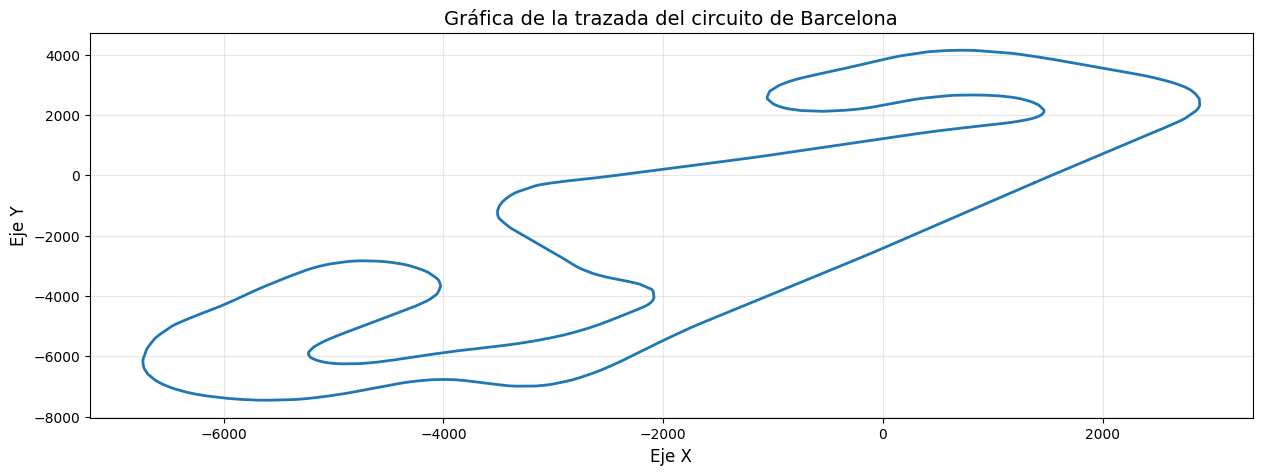

In [6]:
# Gráfica de la trazada
plt.figure(figsize=(15, 5))
plt.plot(telemetry['X'], telemetry['Y'],linewidth=2)
plt.xlabel('Eje X', fontsize=12)
plt.ylabel('Eje Y', fontsize=12)
plt.title('Gráfica de la trazada del circuito de Barcelona', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

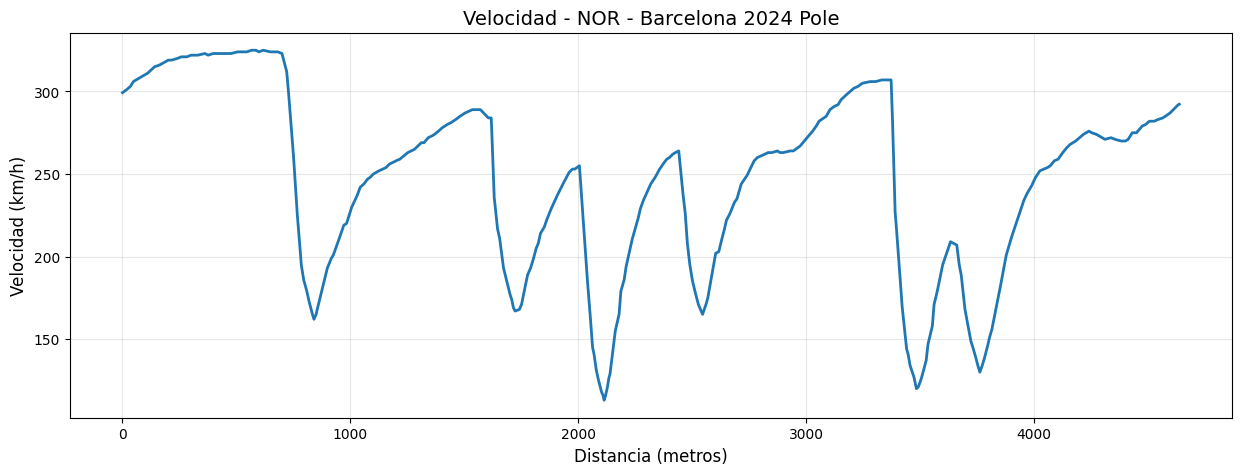

In [5]:
# Velocidad vs Distancia
plt.figure(figsize=(15, 5))
plt.plot(telemetry['Distance'], telemetry['Speed'], linewidth=2)
plt.xlabel('Distancia (metros)', fontsize=12)
plt.ylabel('Velocidad (km/h)', fontsize=12)
plt.title(f'Velocidad - {fastest_lap["Driver"]} - Barcelona 2024 Pole', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

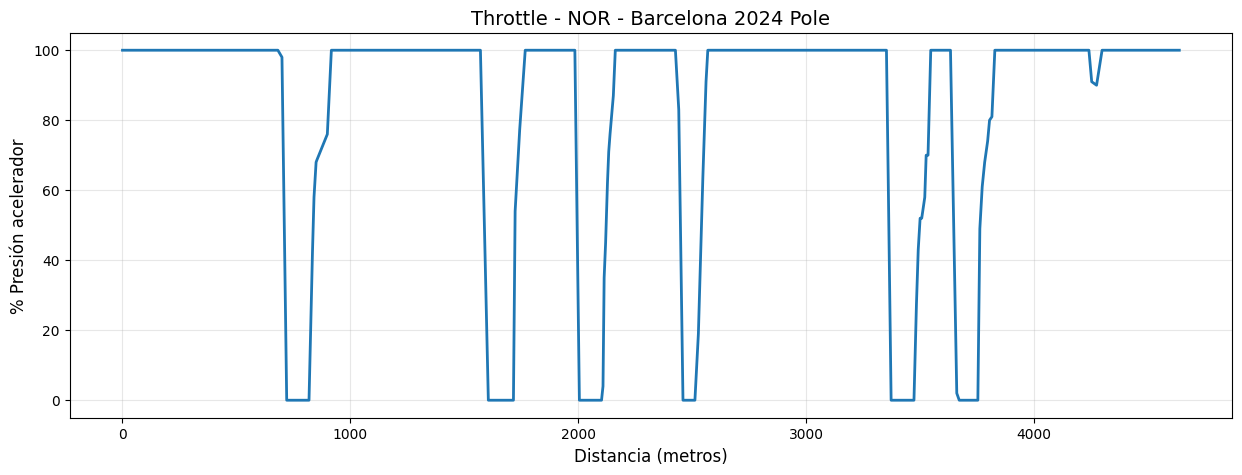

In [7]:
# Throttle
plt.figure(figsize=(15, 5))
plt.plot(telemetry['Distance'], telemetry['Throttle'], linewidth=2)
plt.xlabel('Distancia (metros)', fontsize=12)
plt.ylabel('% Presión acelerador', fontsize=12)
plt.title(f'Throttle - {fastest_lap["Driver"]} - Barcelona 2024 Pole', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

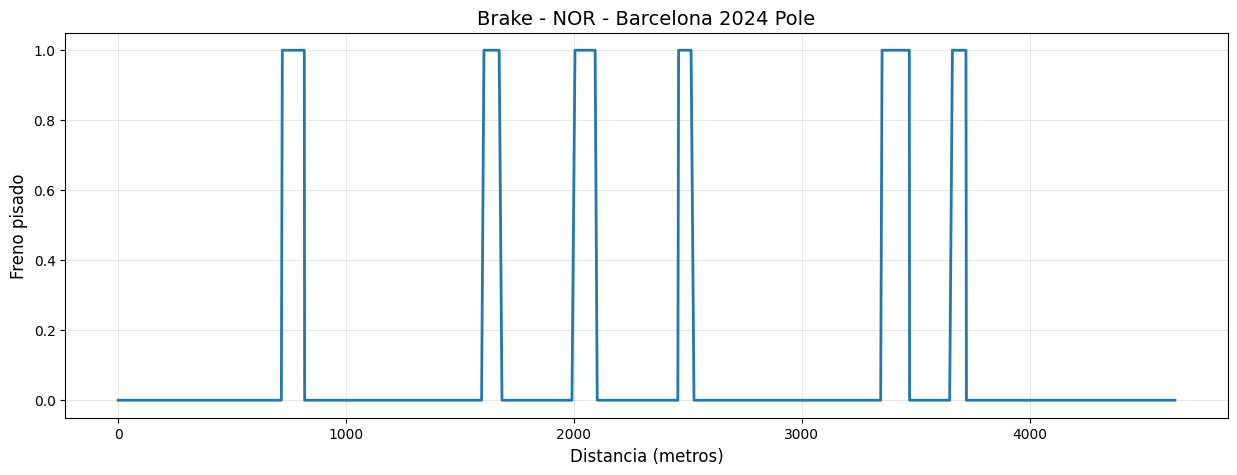

In [8]:
# Brake
plt.figure(figsize=(15, 5))
plt.plot(telemetry['Distance'], telemetry['Brake'], linewidth=2)
plt.xlabel('Distancia (metros)', fontsize=12)
plt.ylabel('Freno pisado', fontsize=12)
plt.title(f'Brake - {fastest_lap["Driver"]} - Barcelona 2024 Pole', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

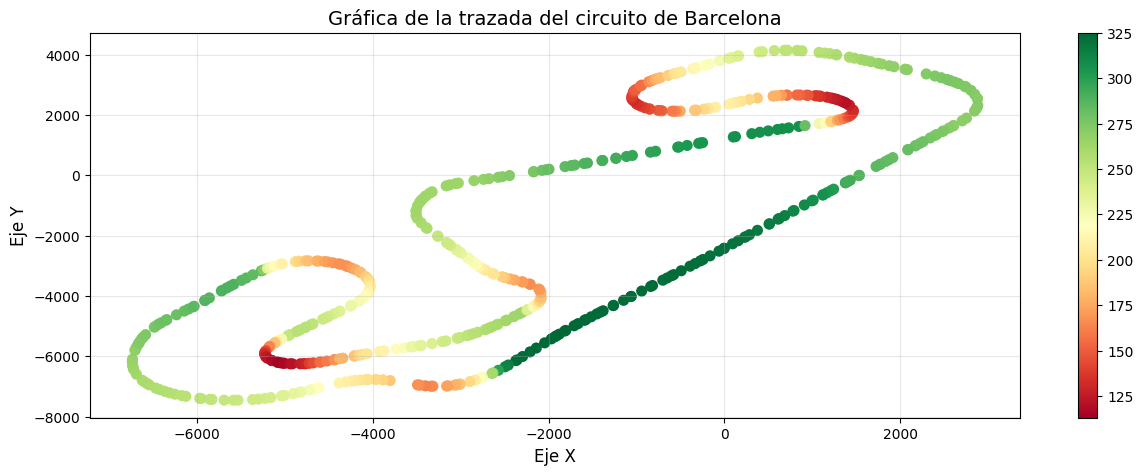

In [9]:
# Velocidad en la trazada
plt.figure(figsize=(15, 5))
plt.scatter(telemetry['X'], telemetry['Y'], c=telemetry['Speed'], cmap='RdYlGn', linewidth=2)
plt.colorbar()
plt.xlabel('Eje X', fontsize=12)
plt.ylabel('Eje Y', fontsize=12)
plt.title('Gráfica de la trazada del circuito de Barcelona', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

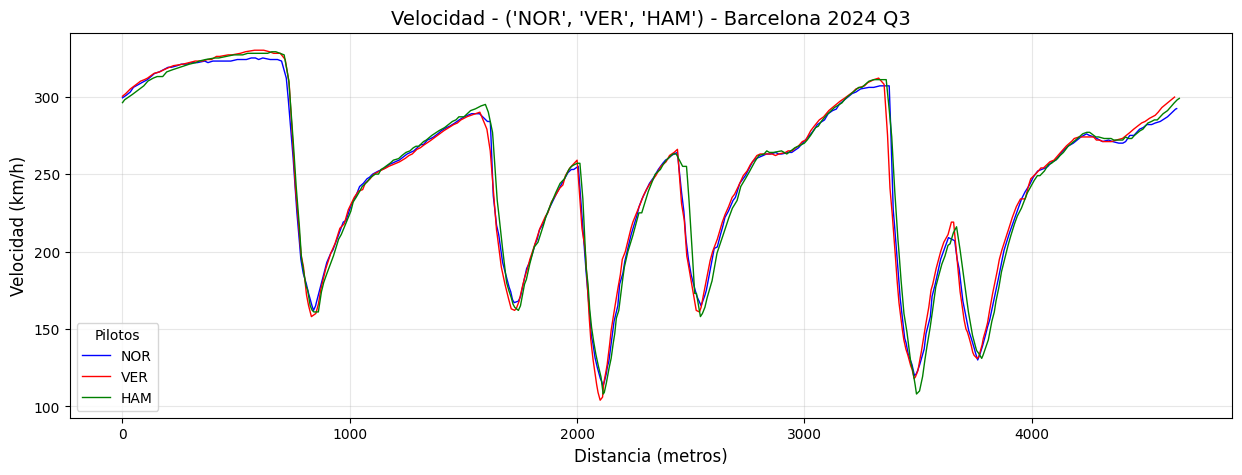

In [32]:
# Velocidad tres primeros
primero = session.results['Abbreviation'].iloc[0]
segundo = session.results['Abbreviation'].iloc[1]
tercero = session.results['Abbreviation'].iloc[2]
vuelta_primero = session.laps.pick_drivers(primero).pick_fastest().get_telemetry()
vuelta_segundo = session.laps.pick_drivers(segundo).pick_fastest().get_telemetry()
vuelta_tercero = session.laps.pick_drivers(tercero).pick_fastest().get_telemetry()
plt.figure(figsize=(15, 5))
plt.plot(vuelta_primero['Distance'], vuelta_primero['Speed'],linewidth=1,c='b',label=primero)
plt.plot(vuelta_segundo['Distance'], vuelta_segundo['Speed'],linewidth=1,c='r',label=segundo)
plt.plot(vuelta_tercero['Distance'], vuelta_tercero['Speed'],linewidth=1,c='g',label=tercero)
plt.xlabel('Distancia (metros)', fontsize=12)
plt.ylabel('Velocidad (km/h)', fontsize=12)
plt.legend(title='Pilotos')
plt.title(f'Velocidad - {primero, segundo, tercero} - Barcelona 2024 Q3', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()